In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
sys.path.append('../experiments')
import dvu
import seaborn as sns
import os
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
from os.path import join
import numpy as np
import imodelsx.process_results
import neuro.features.qa_questions as qa_questions
import joblib
from tqdm import tqdm
from neuro import analyze_helper, viz
fit_encoding = __import__('02_fit_encoding')
dvu.set_style()

# results_dir = analyze_helper.best_results_dir
results_dir = '/home/chansingh/mntv1/deep-fMRI/encoding/feb13_2025_test_tabpfn'
rr, cols_varied, mets = analyze_helper.load_clean_results(results_dir)
# joblib.dump({'r': rr, 'cols_varied': cols_varied, 'mets': mets}, 'results.pkl')
# data = joblib.load('results.pkl')
# rr, cols_varied, mets = data['r'], data['cols_varied'], data['mets']
metric_sort = 'corrs_tune_pc_weighted_mean'

100%|██████████| 60/60 [00:06<00:00,  8.73it/s]

experiment varied these params: ['subject', 'num_stories', 'encoding_model', 'ndelays']



/home/chansingh/imodelsx/imodelsx/process_results.py:92: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[k] = df[k].fillna(np.nan)


/tmp/ipykernel_1590480/3304347859.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['grouping'] = r['num_stories'].astype(


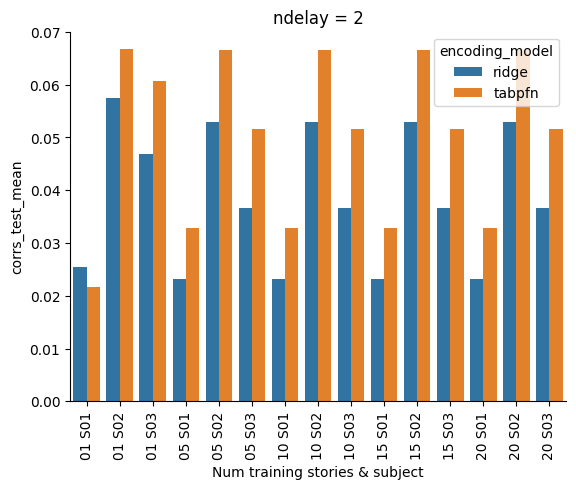

In [ ]:
ndel = 2
r = rr[rr.ndelays == ndel]
r['grouping'] = r['num_stories'].astype(
    str).str.zfill(2) + ' ' + r['subject'].astype(str)
sns.barplot(data=r, x='grouping', y='corrs_test_mean',
            hue='encoding_model', order=sorted(r['grouping'].unique()), hue_order=['ridge', 'tabpfn'])
# axis labels vertical
plt.xticks(rotation=90)
plt.xlabel('Num training stories & subject')
plt.title('ndelay = ' + str(ndel))
plt.show()